In [200]:
import numpy as np
import pandas as pd
import os
from datetime import date
import matplotlib.pyplot as plt
import time
import sys

## Q2

In [207]:
def forward(old_df, remain, M):
    ## ID, points, last, [remains], counts/prob
    species = []
    for i in range(M):
        species.append(str(i))
    new_df = pd.DataFrame(columns = ['points', 'last'] + species + ['prob'])
    def forward_(row, new_df, remain, M):
        ## points, last, [species], counts
        for i in range(M):
            if row[i + 2] - 1 < 0:
                continue
            res = row.copy()
            res[i + 2] = row[i + 2] - 1
            if i == row[1]:
                res[0] = row[0] + 1
            res[1] = i
            res[-1] = row[-1] * 1.0 * row[i + 2]/remain
                                        
            idx = res[0]
            idx = 100*idx + res[1]
            for i in range(M):
                idx = 100*idx + res[i + 2]                           
            if idx in new_df.index:
                new_df.loc[idx, 'prob'] += res[-1]
            else:
                new_df.loc[idx] = res
    old_df.apply(lambda x: forward_(x, new_df, remain, M), axis = 1)
    return new_df

old_df = pd.DataFrame(columns = ['points', 'last'] + ['0', '1'] + ['prob'])
old_df.loc[21313] = [0, 2, 13, 13, 1]

In [212]:
df = pd.DataFrame(columns = ['points', 'last'] + ['0', '1'] + ['prob'])
df.loc[20303] = [0, 2, 3, 3, 1]

N = 6
M = 2
for j in range(N):
    print(j)
    df = forward(df, N-j, M)
print(df)
df['prob'].sum()

0
1
2
3
4
5
        points last  0  1  prob
4010000      4    1  0  0  0.05
2010000      2    1  0  0  0.20
3000000      3    0  0  0  0.10
10000        0    1  0  0  0.05
1000000      1    0  0  0  0.10
3010000      3    1  0  0  0.10
1010000      1    1  0  0  0.10
2000000      2    0  0  0  0.20
0            0    0  0  0  0.05
4000000      4    0  0  0  0.05


1.0

In [213]:
df = pd.DataFrame(columns = ['points', 'last'] + ['0', '1'] + ['prob'])
df.loc[21313] = [0, 2, 13, 13, 1]
N = 26
M = 2
for j in range(N):
    print(j)
    df = forward(df, N-j, M)
print(df)
df['prob'].sum()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
         points last  0  1          prob
24010000     24    1  0  0  9.614830e-08
22010000     22    1  0  0  1.384536e-05
23000000     23    0  0  0  1.153780e-06
20010000     20    1  0  0  4.188220e-04
21000000     21    0  0  0  7.614945e-05
18010000     18    1  0  0  4.653578e-03
19000000     19    0  0  0  1.396073e-03
16010000     16    1  0  0  2.355874e-02
17000000     17    0  0  0  1.047055e-02
14010000     14    1  0  0  6.031037e-02
15000000     15    0  0  0  3.769398e-02
12010000     12    1  0  0  8.208911e-02
13000000     13    0  0  0  7.036209e-02
10010000     10    1  0  0  6.031037e-02
11000000     11    0  0  0  7.036209e-02
8010000       8    1  0  0  2.355874e-02
9000000       9    0  0  0  3.769398e-02
6010000       6    1  0  0  4.653578e-03
7000000       7    0  0  0  1.047055e-02
4010000       4    1  0  0  4.188220e-04
5000000       5    0  0  0  1.396073e-03
2010000       2    1  0  0  1.

1.0

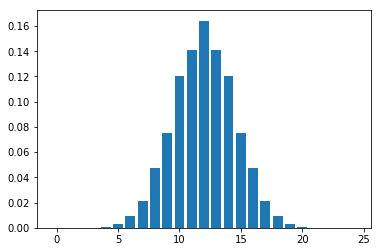

points
0     1.922966e-07
1     2.307559e-06
2     2.769071e-05
3     1.522989e-04
4     8.376440e-04
5     2.792147e-03
6     9.307155e-03
7     2.094110e-02
8     4.711747e-02
9     7.538796e-02
10    1.206207e-01
11    1.407242e-01
12    1.641782e-01
13    1.407242e-01
14    1.206207e-01
15    7.538796e-02
16    4.711747e-02
17    2.094110e-02
18    9.307155e-03
19    2.792147e-03
20    8.376440e-04
21    1.522989e-04
22    2.769071e-05
23    2.307559e-06
24    1.922966e-07
Name: prob, dtype: float64


In [214]:
prob = df.groupby('points')['prob'].sum()
plt.bar(prob.index, prob)
plt.show()
print(prob)

In [215]:
def mean_and_var(key, prob):
    key = np.array(key)
    prob = np.array(prob)
    if abs(np.sum(prob) - 1) >= 1e-10:
        prob = prob/np.sum(prob)
    mean = np.sum(key * prob)
    var = np.sum(prob * (key - mean)**2)
    return mean, var

mean, var = mean_and_var(prob.index, prob)
print(mean, var, np.sqrt(var))

def condition_greater(prob, A, B):
    ## P(X > A| X> B)
    mask = prob.index > A
    prob_A = prob.loc[mask].sum()
    mask = prob.index > B
    prob_B = prob.loc[mask].sum()
    return prob_A/prob_B

condition_greater(prob, 12, 6)

12.0 6.24 2.49799919936


0.42346653156861502

### N = 52, M = 4

In [217]:
N = 52
M = 4

df = pd.DataFrame(columns = ['points', 'last'] + ['0', '1', '2', '3'] + ['prob'])
df.loc[413131313] = [0, M, N//M, N//M, N//M, N//M, 1]

for j in range(N):
    sys.stdout.write(str(j) + ' ')
    sys.stdout.flush()
    cur = time.time()
    df = forward(df, N - j, M)
    print("%.2f sec" % (time.time() - cur))

print(df)
df['prob'].sum()

0 0.03 sec
1 0.07 sec
2 0.14 sec
3 0.41 sec
4 0.96 sec
5 2.07 sec
6 3.83 sec
7 6.78 sec
8 11.49 sec
9 17.63 sec
10 27.38 sec
11 42.50 sec
12 65.33 sec
13 90.64 sec
14 130.40 sec
15 185.46 sec
16 248.73 sec
17 350.86 sec
18 477.69 sec
19 608.80 sec
20 757.43 sec
21 988.88 sec
22 1258.68 sec
23 1498.59 sec
24 1712.19 sec
25 1906.57 sec
26 2050.93 sec
27 2565.91 sec
28 2255.73 sec
29 2304.82 sec
30 2101.96 sec
31 1988.11 sec
32 1838.52 sec
33 1655.99 sec
34 1467.63 sec
35 1233.53 sec
36 978.49 sec
37 769.81 sec
38 620.30 sec
39 489.85 sec
40 357.36 sec
41 261.98 sec
42 196.74 sec
43 138.60 sec
44 96.04 sec
45 64.78 sec
46 41.79 sec
47 25.57 sec
48 14.78 sec
49 7.54 sec
50 3.08 sec
51 0.81 sec
             points last  0  1  2  3          prob
480300000000     48    3  0  0  0  0  1.118469e-28
460300000000     46    3  0  0  0  0  3.677528e-25
470200000000     47    2  0  0  0  0  8.052980e-27
440300000000     44    3  0  0  0  0  3.179719e-22
450200000000     45    2  0  0  0  0  1.220071

1.0

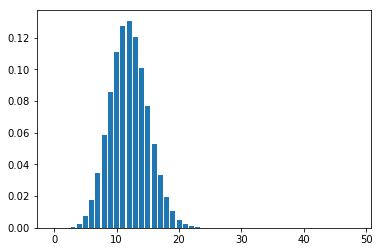

points
0     1.181747e-06
1     1.838917e-05
2     1.404818e-04
3     7.020968e-04
4     2.581075e-03
5     7.440618e-03
6     1.751034e-02
7     3.458032e-02
8     5.846511e-02
9     8.591302e-02
10    1.110256e-01
11    1.273670e-01
12    1.306939e-01
13    1.207044e-01
14    1.008561e-01
15    7.657080e-02
16    5.301180e-02
17    3.356934e-02
18    1.949267e-02
19    1.040086e-02
20    5.108389e-03
21    2.312689e-03
22    9.661350e-04
23    3.727272e-04
24    1.328638e-04
25    4.377268e-05
26    1.332875e-05
27    3.750298e-06
28    9.745910e-07
29    2.337406e-07
30    5.168388e-08
31    1.052225e-08
32    1.969134e-09
33    3.380462e-10
34    5.310697e-11
35    7.612598e-12
36    9.922151e-13
37    1.171013e-13
38    1.245182e-14
39    1.185777e-15
40    1.003882e-16
41    7.487351e-18
42    4.863811e-19
43    2.711413e-20
44    1.271888e-21
45    4.880285e-23
46    1.471011e-24
47    3.221192e-26
48    4.473878e-28
Name: prob, dtype: float64


In [218]:
prob = df.groupby('points')['prob'].sum()
plt.bar(prob.index, prob)
plt.show()
print(prob)

In [220]:
mean, var = mean_and_var(prob.index, prob)
print(mean, var, np.sqrt(var))

condition_greater(prob, 12, 6)

12.0 9.17647058824 3.02926898578


0.43593897575355484